This jupyter notebook contains the bulk of the data cleaning and analysis for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

Connect to the IMDB database using sqlite3 and save it as a dataframe using Pandas

In [2]:
con = sqlite3.connect('/Users/weatherford/Documents/Flatiron/Trystan_Jalil_phase1_project/Trystan_Work/zippedData/im.db')
cursor_obj = con.cursor()

imdb = pd.read_sql("""
SELECT *
FROM movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id;
""", con)


imdb

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,tt9805820,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary


Retitle columns so that there are no duplicate names. This will make it easier to drop redundant columns later.

In [3]:
imdb = imdb.set_axis(['movie_id', 'averagerating', 'numvotes', 'movie_id_2', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres'], axis=1)

In [4]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   movie_id_2       73856 non-null  object 
 4   primary_title    73856 non-null  object 
 5   original_title   73856 non-null  object 
 6   start_year       73856 non-null  int64  
 7   runtime_minutes  66236 non-null  float64
 8   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [5]:
imdb.head()

,movie_id,averagerating,numvotes,movie_id_2,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [6]:
imdb.sort_values(by=['runtime_minutes'], ascending = False)

,movie_id,averagerating,numvotes,movie_id_2,primary_title,original_title,start_year,runtime_minutes,genres
44210,tt8273150,5.0,17,tt8273150,Logistics,Logistics,2012,51420.0,Documentary
12828,tt2659636,6.2,69,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary
34936,tt2008009,8.9,219,tt2008009,The Clock,The Clock,2010,1440.0,Drama
62024,tt8677246,8.6,5,tt8677246,Bullfighting Memories,Bullfighting Memories,2017,1100.0,"Comedy,History"
39290,tt9047474,8.5,100,tt9047474,La flor,La flor,2018,808.0,"Drama,Fantasy,Musical"
...,...,...,...,...,...,...,...,...,...
73843,tt9657910,5.0,7,tt9657910,Trilece,Trilece,2018,NaN,History
73844,tt9668598,5.5,317,tt9668598,Musabbar,Musabbar,2019,NaN,"Horror,Thriller"
73848,tt9722952,7.0,6,tt9722952,O Is Bende,O Is Bende,2019,NaN,Comedy
73850,tt9783738,7.4,7,tt9783738,Bangkok Dark Tales,Bangkok Dark Tales,2019,NaN,Horror


In [7]:
imdb = imdb.drop(index=44210) #The runtime of this movie was a staggering outlier at 51,420 minutes

In [8]:
imdb

,movie_id,averagerating,numvotes,movie_id_2,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,tt9805820,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary


Pairplot to compare relationship between multiple variables out of a random sample of 500

In [9]:
subset_imdb = imdb[['averagerating', 'runtime_minutes', 'numvotes', 'genres']].sample(500)

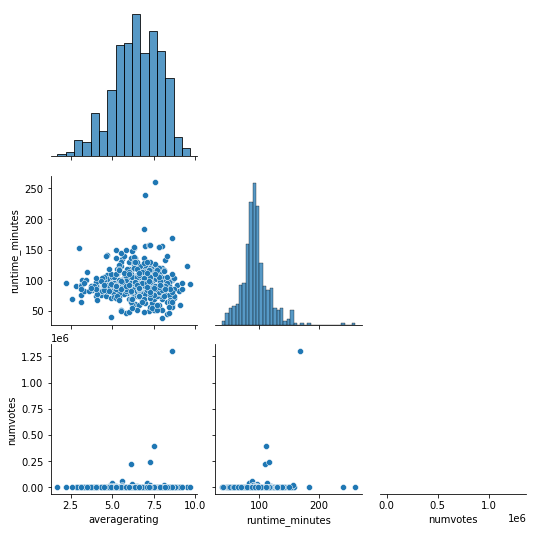

In [10]:
import seaborn as sns
sns.pairplot(data = subset_imdb, corner = True)

Join multiple SQL tables to have all of the information I want access to in one data frame (runtime, average rating, genres, names of directors and other members of the cast, etc.)

In [11]:
imdb_2 = pd.read_sql("""
SELECT *
FROM movie_basics
INNER JOIN directors ON movie_basics.movie_id = directors.movie_id
INNER JOIN movie_ratings ON directors.movie_id = movie_ratings.movie_id
INNER JOIN persons ON directors.person_id=persons.person_id;
""", con)


imdb_2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,person_id,movie_id,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,nm0712540,tt0063540,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,nm0712540,tt0063540,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,nm0712540,tt0063540,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,nm0712540,tt0063540,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,nm0002411,tt0066787,7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,nm5300859,tt9914642,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181383,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,nm5300859,tt9914642,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,nm1716653,tt9914942,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181385,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,nm1716653,tt9914942,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"


In [12]:
imdb_2 = imdb_2.drop_duplicates(subset=['movie_id']) #clean up duplicates apparent from the first join
imdb_2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,person_id,movie_id,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,nm0712540,tt0063540,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,nm0002411,tt0066787,7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,nm0000080,tt0069049,6.9,4517,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer"
7,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,nm0611531,tt0069204,6.1,13,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer"
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,nm0749914,tt0100275,6.5,119,nm0749914,Raoul Ruiz,1941.0,2011.0,"director,writer,producer"


In [13]:
imdb_2 = imdb_2.set_axis(['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 
                        'movie_id_2', 'person_id',  'movie_id_3', 'averagerating','numvotes', 'person_id_2', 
                        'primary_name', 'birth_year', 'death_year', 'primary_profession'], axis=1)

#retitle columns to get discrete column names to be able to drop duplicate columns

imdb_2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id_2,person_id,movie_id_3,averagerating,numvotes,person_id_2,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,nm0712540,tt0063540,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,nm0002411,tt0066787,7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,nm0000080,tt0069049,6.9,4517,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer"
7,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,nm0611531,tt0069204,6.1,13,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer"
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,nm0749914,tt0100275,6.5,119,nm0749914,Raoul Ruiz,1941.0,2011.0,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181378,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,nm0812850,tt9913084,6.2,6,nm0812850,Giancarlo Soldi,1954.0,NaN,"director,writer,producer"
181380,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,nm4394529,tt9914286,8.7,136,nm4394529,Ahmet Faik Akinci,NaN,NaN,"director,writer"
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,nm5300859,tt9914642,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,nm1716653,tt9914942,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"


In [14]:
imdb_2.drop('movie_id_2', inplace=True, axis=1)
imdb_2.drop('movie_id_3', inplace=True, axis=1)
imdb_2.drop('person_id_2', inplace=True, axis=1)

In [15]:
imdb_2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,7.2,43,Mani Kaul,1944.0,2011.0,"director,writer,actor"
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,6.9,4517,Orson Welles,1915.0,1985.0,"actor,director,writer"
7,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,6.1,13,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer"
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0749914,6.5,119,Raoul Ruiz,1941.0,2011.0,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181378,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,nm0812850,6.2,6,Giancarlo Soldi,1954.0,NaN,"director,writer,producer"
181380,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",nm4394529,8.7,136,Ahmet Faik Akinci,NaN,NaN,"director,writer"
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,nm5300859,8.5,8,Chris Jordan,NaN,NaN,"director,writer,editor"
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5,Laura Jou,NaN,NaN,"miscellaneous,actress,director"


Pull Movie Budget CSV that was cleaned and created in the "Movie_Budgets CSV Cleaning" jupyter notebook

In [16]:
mov_budg =(pd.read_csv('zippedData/movie_budgets_roi.csv', delimiter=','))
mov_budg.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636


In [17]:
mov_budg.drop('Unnamed: 0', inplace=True, axis=1)

Merge IMDB data and movie budget data on movie title

In [18]:
df_master = pd.merge(mov_budg, imdb_2, how='inner', left_on = 'movie', right_on = 'primary_title')
df_master

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi,movie_id,primary_title,...,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,tt1775309,Avatar,...,2011,93.0,Horror,nm3786927,6.1,43,Atsushi Wada,NaN,NaN,director
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,tt1298650,Pirates of the Caribbean: On Stranger Tides,...,2011,136.0,"Action,Adventure,Fantasy",nm0551128,6.6,447624,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,tt6565702,Dark Phoenix,...,2019,113.0,"Action,Adventure,Sci-Fi",nm1334526,6.0,24451,Simon Kinberg,1973.0,NaN,"producer,writer,director"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,tt2395427,Avengers: Age of Ultron,...,2015,141.0,"Action,Adventure,Sci-Fi",nm0923736,7.3,665594,Joss Whedon,1964.0,NaN,"writer,producer,director"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,tt4154756,Avengers: Infinity War,...,2018,149.0,"Action,Adventure,Sci-Fi",nm0751577,8.5,670926,Anthony Russo,1970.0,NaN,"producer,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000,-100.000000,tt3973612,Stories of Our Lives,...,2014,60.0,Drama,nm5874888,7.5,85,Jim Chuchu,NaN,NaN,"director,writer,editor"
2862,68,"Jul 6, 2001",Cure,10000,94596,94596,84596,845.960000,tt1872026,Cure,...,2011,93.0,Drama,nm0948107,4.9,11,Bill Yip,NaN,NaN,"assistant_director,producer,actor"
2863,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,-49.066667,tt1880418,Newlyweds,...,2011,95.0,"Comedy,Drama",nm0122653,6.4,1436,Edward Burns,1968.0,NaN,"actor,writer,producer"
2864,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-100.000000,tt7837402,Red 11,...,2019,77.0,"Horror,Sci-Fi,Thriller",nm0001675,5.6,43,Robert Rodriguez,1968.0,NaN,"producer,writer,director"


Explore which people in the film industry have made the greatest net profit, along with their average ROI's

In [19]:
z = df_master.groupby(['primary_name'])['roi'].mean().sort_values().to_frame()


In [20]:
z1=  df_master.groupby(['primary_name'])['net_profit'].mean().sort_values()
zjoin = pd.merge(z1 ,z,on='primary_name')
zjoin.tail(15)

,net_profit,roi
primary_name,,
Ronnie Del Carmen,6.792360e+08,388.134853
Colin Trevorrow,7.187636e+08,578.275820
Peter Jackson,7.243160e+08,289.726406
Tim Miller,7.430256e+08,1281.078609
Sam Mendes,7.450740e+08,324.235232
Lee Unkrich,7.459438e+08,395.222195
Yarrow Cheney,8.117505e+08,1082.334045
Christophe Gans,8.438154e+08,1814.577738
Kyle Balda,1.023032e+09,1373.829428


Create a subset to pairplot to look at the relationship between the different variables

In [21]:
master_sub = df_master[['production_budget', 'net_profit', 'roi', 'runtime_minutes', 'averagerating']].sample(500)

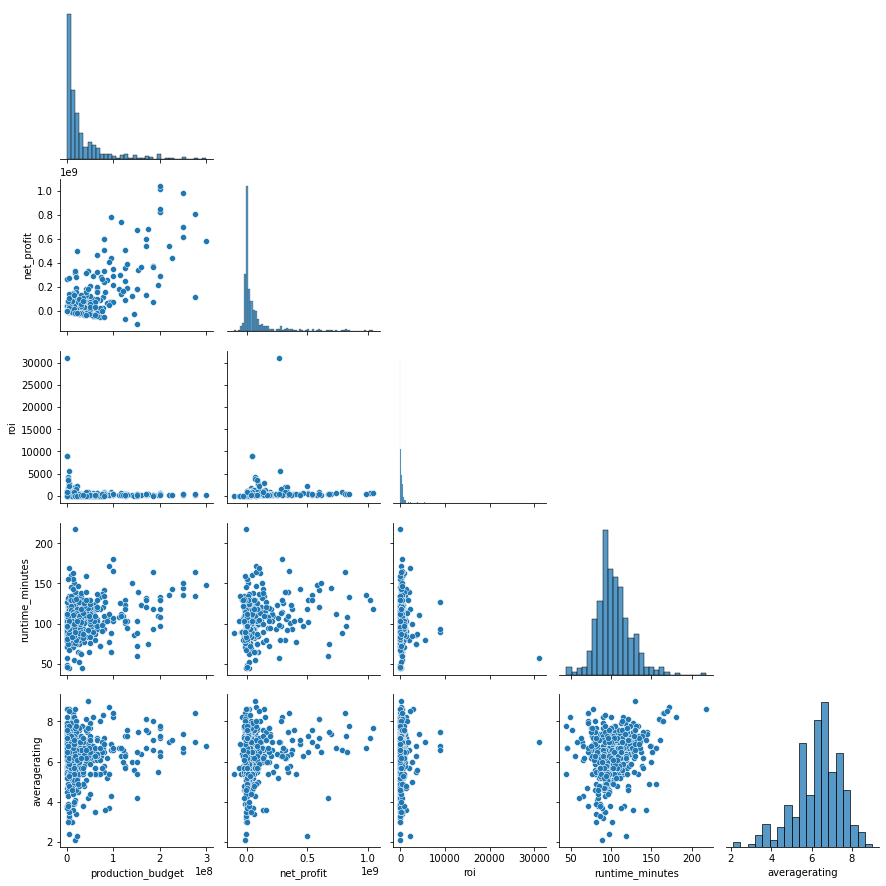

In [22]:
import seaborn as sns
sns.pairplot(data = master_sub, corner = True)

Plot average rating and ROI to look for a relationship

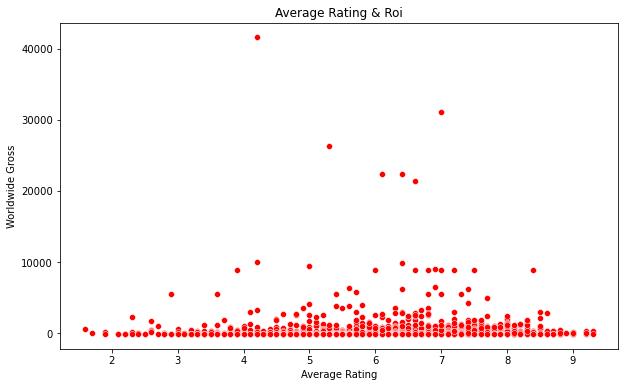

<Figure size 432x288 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'averagerating', y = 'roi', data = df_master, ax = ax, color = 'red')

ax.set_xlabel('Average Rating')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Average Rating & Roi')
plt.show()

plt.savefig('roi_rating.png', dpi=300)


Plot runtime and ROI to look for a relationship

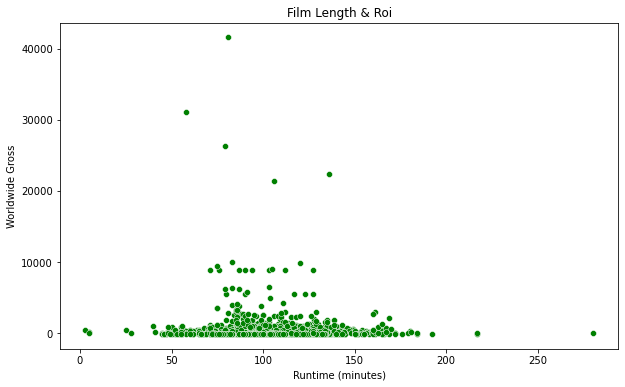

<Figure size 432x288 with 0 Axes>

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'runtime_minutes', y = 'roi', data = df_master, ax = ax, color = 'g')

ax.set_xlabel('Runtime (minutes)')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Film Length & Roi')
plt.show()

plt.savefig('roi_length.png', dpi=300)


In [25]:
rating_roi=df_master.loc[:,['averagerating','roi']]
correlation=np.corrcoef(rating_roi['averagerating'], rating_roi['roi'])
correlation=correlation[0][1] 
correlation 
# 0.011783996326472042, there is effectivly no correlation between movie rating and ROI

0.011783996326472042

In [26]:
np.corrcoef(df_master['runtime_minutes'], df_master['roi'])

array([[nan, nan],
       [nan,  1.]])

In [27]:
runtime_roi = df_master.loc[:,['runtime_minutes','roi']]
correlation_run=np.corrcoef(runtime_roi['runtime_minutes'], runtime_roi['roi'])
correlation_run=correlation_run[0][1] 
correlation_run

nan

In [28]:
df_master.sort_values(by=['averagerating'], ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi,movie_id,primary_title,...,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
1721,86,"Jun 23, 2015",Crossroads,500000,0,0,-500000,-100.000000,tt8106586,Crossroads,...,2018,NaN,Documentary,nm2393401,9.3,22,Ron Yassen,NaN,NaN,"producer,director"
1715,67,"Feb 15, 2002",Crossroads,12000000,37188667,57000000,45000000,375.000000,tt8106586,Crossroads,...,2018,NaN,Documentary,nm2393401,9.3,22,Ron Yassen,NaN,NaN,"producer,director"
662,16,"Dec 27, 2000",Traffic,48000000,124107476,208300000,160300000,333.958333,tt4061640,Traffic,...,2014,110.0,Documentary,nm4891189,9.2,64,Pete Middleton,NaN,NaN,"director,cinematographer,editor"
2348,29,"May 12, 2017",The Wall,3000000,1803064,4495262,1495262,49.842067,tt1455256,The Wall,...,2010,78.0,Documentary,nm3198076,9.2,8,Ricardo Martinez,NaN,NaN,"editorial_department,visual_effects,editor"
1908,57,"Mar 19, 2010",The Runaways,9500000,3573673,5278632,-4221368,-44.435453,tt6168914,The Runaways,...,2019,108.0,Adventure,nm3699308,9.2,47,Richard Heap,NaN,NaN,"director,editor,cinematographer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,17,"Jul 27, 2001",Jackpot,400000,44452,44452,-355548,-88.887000,tt3309662,Jackpot,...,2013,132.0,"Comedy,Thriller",nm0004072,2.1,647,Kaizad Gustad,1968.0,NaN,"director,writer,miscellaneous"
697,3,"Nov 4, 1994",Frankenstein,45000000,22006296,112006296,67006296,148.902880,tt2286560,Frankenstein,...,2011,82.0,"Drama,Horror",nm5098134,1.9,67,Jordan Salkil,NaN,NaN,"writer,director,producer"
713,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294,-99.836209,tt0249516,Foodfight!,...,2012,91.0,"Action,Animation,Comedy",nm0440415,1.9,8248,Lawrence Kasanoff,1959.0,NaN,"producer,writer,director"
1167,44,"Apr 23, 2010",The Losers,25000000,23591432,29863840,4863840,19.455360,tt3746918,The Losers,...,2013,112.0,Drama,nm2807332,1.7,70,Yi-an Lou,NaN,NaN,"writer,director,actor"


In [29]:
df_master.sort_values(['averagerating'],ascending=True).groupby('primary_name').head(20)

#check to see if any specific movie industry professionals have especially high ratings

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi,movie_id,primary_title,...,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
1658,48,"Feb 11, 2011",Justin Bieber: Never Say Never,13000000,73013910,99034125,86034125,661.800962,tt1702443,Justin Bieber: Never Say Never,...,2011,105.0,"Documentary,Music",nm0160840,1.6,74978,Jon M. Chu,1979.0,NaN,"producer,writer,director"
1167,44,"Apr 23, 2010",The Losers,25000000,23591432,29863840,4863840,19.455360,tt3746918,The Losers,...,2013,112.0,Drama,nm2807332,1.7,70,Yi-an Lou,NaN,NaN,"writer,director,actor"
713,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294,-99.836209,tt0249516,Foodfight!,...,2012,91.0,"Action,Animation,Comedy",nm0440415,1.9,8248,Lawrence Kasanoff,1959.0,NaN,"producer,writer,director"
697,3,"Nov 4, 1994",Frankenstein,45000000,22006296,112006296,67006296,148.902880,tt2286560,Frankenstein,...,2011,82.0,"Drama,Horror",nm5098134,1.9,67,Jordan Salkil,NaN,NaN,"writer,director,producer"
1050,6,"Jun 5, 2015",United Passions,30000000,918,168832,-29831168,-99.437227,tt2814362,United Passions,...,2014,110.0,"Drama,History,Sport",nm0041474,2.1,3878,Frédéric Auburtin,1962.0,NaN,"assistant_director,director,actor"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,57,"Mar 19, 2010",The Runaways,9500000,3573673,5278632,-4221368,-44.435453,tt6168914,The Runaways,...,2019,108.0,Adventure,nm3699308,9.2,47,Richard Heap,NaN,NaN,"director,editor,cinematographer"
662,16,"Dec 27, 2000",Traffic,48000000,124107476,208300000,160300000,333.958333,tt4061640,Traffic,...,2014,110.0,Documentary,nm4891189,9.2,64,Pete Middleton,NaN,NaN,"director,cinematographer,editor"
2348,29,"May 12, 2017",The Wall,3000000,1803064,4495262,1495262,49.842067,tt1455256,The Wall,...,2010,78.0,Documentary,nm3198076,9.2,8,Ricardo Martinez,NaN,NaN,"editorial_department,visual_effects,editor"
1715,67,"Feb 15, 2002",Crossroads,12000000,37188667,57000000,45000000,375.000000,tt8106586,Crossroads,...,2018,NaN,Documentary,nm2393401,9.3,22,Ron Yassen,NaN,NaN,"producer,director"


Based on Jalil's data analysis of genre using "The Movie Database" data, horror, thriller, and romance were the genres we decided to focus on. Below is code for sorting the database by each genre and extracting conclusions within each subset.

Horror Subset Sorting

In [30]:
horror = df_master.set_index('genres').filter(regex='Horror', axis=0)
horror.sort_values(by=['net_profit'], ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi,movie_id,primary_title,original_title,start_year,runtime_minutes,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
genres,,,,,,,,,,,,,,,,,,,,
Horror,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,tt1775309,Avatar,Abatâ,2011,93.0,nm3786927,6.1,43,Atsushi Wada,NaN,NaN,director
"Horror,Thriller",24,"Sep 8, 2017",It,35000000,327481748,697457969,662457969,1892.737054,tt1396484,It,It,2017,135.0,nm0615592,7.4,359123,Andy Muschietti,NaN,NaN,"director,writer,producer"
Horror,2,"Nov 22, 2017",Coco,175000000,209726015,798008101,623008101,356.004629,tt7002100,Coco,Coco,2017,98.0,nm9039216,7.4,35,Neil Boultby,NaN,NaN,"director,writer,editor"
Horror,5,"Jul 13, 1990",Ghost,22000000,217631306,517600000,495600000,2252.727273,tt2175671,Ghost,Ghost,2012,118.0,nm1680452,2.3,205,Puja Bedi,NaN,NaN,"producer,writer,miscellaneous"
Horror,27,"Dec 25, 2015",The Revenant,135000000,183637894,532938302,397938302,294.769113,tt3300078,The Revenant,The Revenant,2012,80.0,nm5419512,6.0,20,Josh Jones,NaN,NaN,"miscellaneous,director,editor"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Horror,Mystery,Thriller",10,"Jul 1, 2005",Rebound,45000000,16809014,17492014,-27507986,-61.128858,tt2837194,Rebound,Rebound,2014,84.0,nm2148858,4.2,259,Megan Freels Johnston,NaN,NaN,"producer,writer,director"
Horror,30,"Sep 30, 2019",Unhinged,29000000,0,0,-29000000,-100.000000,tt5940342,Unhinged,Unhinged,2017,93.0,nm4367233,4.2,512,Dan Allen,NaN,NaN,"director,editor,producer"
"Comedy,Horror,Sci-Fi",83,"Oct 30, 2015",Freaks of Nature,33000000,70958,70958,-32929042,-99.784976,tt1817771,Freaks of Nature,Freaks of Nature,2015,92.0,nm0681852,5.9,9670,Robbie Pickering,NaN,NaN,"writer,director,actor"


In [31]:
type(horror)

pandas.core.frame.DataFrame

In [32]:
horror.reset_index(inplace = True)
horror

#horror.drop('movie_id_2', inplace=True, axis=0)
#horror.drop(horror.index[1])

,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi,movie_id,...,original_title,start_year,runtime_minutes,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,Horror,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,tt1775309,...,Abatâ,2011,93.0,nm3786927,6.1,43,Atsushi Wada,NaN,NaN,director
1,"Action,Adventure,Horror",69,"Jun 21, 2013",World War Z,190000000,202359711,531514650,341514650,179.744553,tt0816711,...,World War Z,2013,116.0,nm0286975,7.0,553751,Marc Forster,1969.0,NaN,"producer,director,writer"
2,"Action,Horror,Sci-Fi",94,"Aug 10, 2018",The Meg,178000000,145443742,529530715,351530715,197.489166,tt4779682,...,The Meg,2018,113.0,nm0005509,5.7,114042,Jon Turteltaub,1963.0,NaN,"producer,director,writer"
3,Horror,2,"Nov 22, 2017",Coco,175000000,209726015,798008101,623008101,356.004629,tt7002100,...,Coco,2017,98.0,nm9039216,7.4,35,Neil Boultby,NaN,NaN,"director,writer,editor"
4,"Comedy,Fantasy,Horror",89,"May 11, 2012",Dark Shadows,150000000,79727149,238202668,88202668,58.801779,tt1077368,...,Dark Shadows,2012,113.0,nm0000318,6.2,229818,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,"Adventure,Horror,Mystery",51,"Apr 21, 2015",Ten,25000,0,0,-25000,-100.000000,tt2496400,...,Ten,2014,83.0,nm4664031,5.4,623,Michael J. Epstein,NaN,NaN,"sound_department,editor,camera_department"
356,"Horror,Mystery,Thriller",51,"Apr 21, 2015",Ten,25000,0,0,-25000,-100.000000,tt6415838,...,Ten,2017,82.0,nm4363817,4.7,191,Chris Robert,NaN,NaN,"writer,producer,director"
357,"Drama,Horror,Thriller",59,"Nov 25, 2011",The Ridges,17300,0,0,-17300,-100.000000,tt1781935,...,The Ridges,2011,89.0,nm4192760,2.9,127,Brandon Landers,NaN,NaN,"actor,sound_department,art_department"
358,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-100.000000,tt7837402,...,Red 11,2019,77.0,nm0001675,5.6,43,Robert Rodriguez,1968.0,NaN,"producer,writer,director"


In [33]:
horror_dir = horror.set_index('primary_profession').filter(regex='director', axis=0) #sort on profession and only include directors
horror_dir.reset_index(inplace = True)
horror

,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi,movie_id,...,original_title,start_year,runtime_minutes,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,Horror,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,tt1775309,...,Abatâ,2011,93.0,nm3786927,6.1,43,Atsushi Wada,NaN,NaN,director
1,"Action,Adventure,Horror",69,"Jun 21, 2013",World War Z,190000000,202359711,531514650,341514650,179.744553,tt0816711,...,World War Z,2013,116.0,nm0286975,7.0,553751,Marc Forster,1969.0,NaN,"producer,director,writer"
2,"Action,Horror,Sci-Fi",94,"Aug 10, 2018",The Meg,178000000,145443742,529530715,351530715,197.489166,tt4779682,...,The Meg,2018,113.0,nm0005509,5.7,114042,Jon Turteltaub,1963.0,NaN,"producer,director,writer"
3,Horror,2,"Nov 22, 2017",Coco,175000000,209726015,798008101,623008101,356.004629,tt7002100,...,Coco,2017,98.0,nm9039216,7.4,35,Neil Boultby,NaN,NaN,"director,writer,editor"
4,"Comedy,Fantasy,Horror",89,"May 11, 2012",Dark Shadows,150000000,79727149,238202668,88202668,58.801779,tt1077368,...,Dark Shadows,2012,113.0,nm0000318,6.2,229818,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,"Adventure,Horror,Mystery",51,"Apr 21, 2015",Ten,25000,0,0,-25000,-100.000000,tt2496400,...,Ten,2014,83.0,nm4664031,5.4,623,Michael J. Epstein,NaN,NaN,"sound_department,editor,camera_department"
356,"Horror,Mystery,Thriller",51,"Apr 21, 2015",Ten,25000,0,0,-25000,-100.000000,tt6415838,...,Ten,2017,82.0,nm4363817,4.7,191,Chris Robert,NaN,NaN,"writer,producer,director"
357,"Drama,Horror,Thriller",59,"Nov 25, 2011",The Ridges,17300,0,0,-17300,-100.000000,tt1781935,...,The Ridges,2011,89.0,nm4192760,2.9,127,Brandon Landers,NaN,NaN,"actor,sound_department,art_department"
358,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-100.000000,tt7837402,...,Red 11,2019,77.0,nm0001675,5.6,43,Robert Rodriguez,1968.0,NaN,"producer,writer,director"


In [34]:
horror_dir = horror_dir.sort_values(by=['roi'], ascending = False) # find movies with highest return on investment
horror_dir.reset_index(inplace = True)

horror_dir = horror_dir.drop(index=1)
horror_dir = horror_dir.drop(index=3)

In [35]:
horror_dir.head()

,index,primary_profession,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,...,primary_title,original_title,start_year,runtime_minutes,person_id,averagerating,numvotes,primary_name,birth_year,death_year
0,303,"producer,director,writer","Horror,Mystery,Thriller",80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,...,The Gallows,The Gallows,2015,81.0,nm3951039,4.2,17763,Chris Lofing,NaN,NaN
2,271,"director,producer,writer",Horror,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,...,The Devil Inside,The Devil Inside,2012,83.0,nm0068587,4.2,33522,William Brent Bell,NaN,NaN
4,253,"producer,writer,director","Horror,Mystery,Thriller",63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,...,Insidious,Insidious,2010,103.0,nm1490123,6.9,254197,James Wan,1977.0,NaN
5,272,"director,actor,camera_department","Horror,Mystery,Thriller",14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,...,Unfriended,Unfriended,2014,83.0,nm0300174,5.6,62043,Levan Gabriadze,1969.0,NaN
6,215,"director,writer,producer",Horror,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,...,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,nm0931095,5.7,93122,Tod Williams,1968.0,NaN


In [36]:
horror_dir['roi'].head(20)

0     41556.474000
2     10075.949000
4      6558.059067
5      6336.419800
6      5817.067733
7      5479.296120
8      4141.172100
9      4040.796880
10     3851.737231
11     3798.105556
12     2942.219367
13     2876.130200
14     2824.260233
15     2757.142857
16     2757.142857
17     2756.359840
18     2617.924114
19     2617.924114
20     2588.717700
21     2449.006670
Name: roi, dtype: float64

In [37]:
horror_dir.drop('index', inplace=True, axis=1)

In [38]:
horror_dir.head()

,primary_profession,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi,...,primary_title,original_title,start_year,runtime_minutes,person_id,averagerating,numvotes,primary_name,birth_year,death_year
0,"producer,director,writer","Horror,Mystery,Thriller",80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,41556.474000,...,The Gallows,The Gallows,2015,81.0,nm3951039,4.2,17763,Chris Lofing,NaN,NaN
2,"director,producer,writer",Horror,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,10075.949000,...,The Devil Inside,The Devil Inside,2012,83.0,nm0068587,4.2,33522,William Brent Bell,NaN,NaN
4,"producer,writer,director","Horror,Mystery,Thriller",63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,6558.059067,...,Insidious,Insidious,2010,103.0,nm1490123,6.9,254197,James Wan,1977.0,NaN
5,"director,actor,camera_department","Horror,Mystery,Thriller",14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,6336.419800,...,Unfriended,Unfriended,2014,83.0,nm0300174,5.6,62043,Levan Gabriadze,1969.0,NaN
6,"director,writer,producer",Horror,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,5817.067733,...,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,nm0931095,5.7,93122,Tod Williams,1968.0,NaN


Graph top horror directors based on ROI now that the horror_dir_sub is sorted based on ROI and only includes directors

<ipython-input-39-bc01e65aa822>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


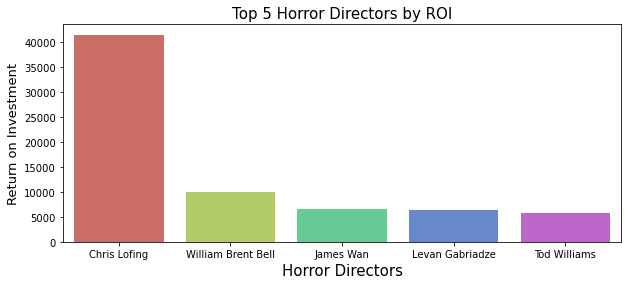

In [39]:
horror_dir_sub = horror_dir.head(5)

fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(x = 'primary_name', y = 'roi', palette = 'hls', data = horror_dir_sub)
ax.set_title('Top 5 Horror Directors by ROI', size=15)
ax.set_xlabel('Horror Directors', size=15)
ax.set_ylabel('Return on Investment', size=13)

fig.show()
fig.savefig('horror_directors_2.png')

Thriller Subset Sorting

In [40]:
thriller = df_master.set_index('genres').filter(regex='Thriller', axis=0)
thriller.reset_index(inplace = True)
thriller_dir = thriller.set_index('primary_profession').filter(regex='director', axis=0)
thriller_dir = thriller_dir.sort_values(by=['roi'], ascending = False)
thriller_dir.reset_index(inplace = True)

thriller_dir = thriller_dir.drop(index=1)
thriller_dir = thriller_dir.drop(index=2)
thriller_dir = thriller_dir.drop(index=3)
thriller_dir = thriller_dir.drop(index=4)
thriller_dir.reset_index(inplace = True)
thriller_dir.drop('index', inplace=True, axis=1)

thriller_dir.head()

,primary_profession,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi,...,primary_title,original_title,start_year,runtime_minutes,person_id,averagerating,numvotes,primary_name,birth_year,death_year
0,"producer,director,writer","Horror,Mystery,Thriller",80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,41556.474000,...,The Gallows,The Gallows,2015,81.0,nm3951039,4.2,17763,Chris Lofing,NaN,NaN
1,"producer,writer,director","Horror,Mystery,Thriller",63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,6558.059067,...,Insidious,Insidious,2010,103.0,nm1490123,6.9,254197,James Wan,1977.0,NaN
2,"director,actor,camera_department","Horror,Mystery,Thriller",14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,6336.419800,...,Unfriended,Unfriended,2014,83.0,nm0300174,5.6,62043,Levan Gabriadze,1969.0,NaN
3,"producer,writer,director","Horror,Thriller",50,"Jan 20, 2017",Split,5000000,138141585,278964806,273964806,5479.296120,...,Split,Split,2016,117.0,nm0796117,7.3,358543,M. Night Shyamalan,1970.0,NaN
4,"visual_effects,director,art_department","Horror,Mystery,Thriller",18,"May 25, 2012",Chernobyl Diaries,1000000,18119640,42411721,41411721,4141.172100,...,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,nm0662086,5.0,60304,Bradley Parker,NaN,NaN


In [41]:
thriller_dir['roi'].head(20)

0     41556.474000
1      6558.059067
2      6336.419800
3      5479.296120
4      4141.172100
5      4040.796880
6      3851.737231
7      3798.105556
8      2942.219367
9      2876.130200
10     2824.260233
11     2757.142857
12     2757.142857
13     2756.359840
14     2617.924114
15     2617.924114
16     2449.006670
17     2448.205462
18     2400.205200
19     1935.899100
Name: roi, dtype: float64

Thriller Director Bar Chart

Graph top thriller directors based on ROI now that the thriller_dir_sub is sorted based on ROI and only includes directors

<ipython-input-42-b197d0f7a9b0>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


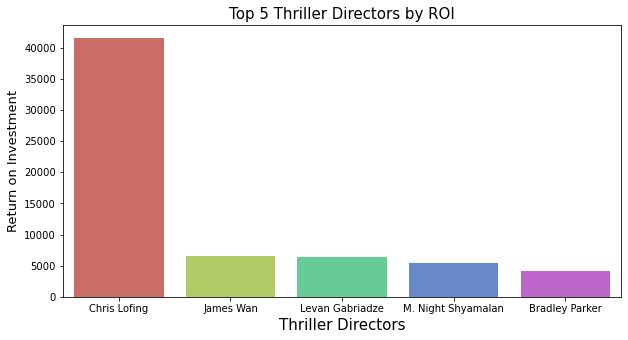

In [42]:
thriller_dir_sub = thriller_dir.head(5)

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = 'primary_name', y = 'roi', palette = 'hls', data = thriller_dir_sub)
ax.set_title('Top 5 Thriller Directors by ROI', size=15)
ax.set_xlabel('Thriller Directors', size=15)
ax.set_ylabel('Return on Investment', size=13)

fig.show()
fig.savefig('thriller_directors.png')

Romance Subset Sorting

In [43]:
romance = df_master.set_index('genres').filter(regex='Romance', axis=0)
romance.reset_index(inplace = True)
romance_dir = romance.set_index('primary_profession').filter(regex='director', axis=0)
romance_dir = romance_dir.sort_values(by=['roi'], ascending = False)
romance_dir.reset_index(inplace = True)

#Clean data entries where different movies of the same title were joined
romance_dir = romance_dir.drop(index=0)
romance_dir = romance_dir.drop(index=1)
romance_dir = romance_dir.drop(index=2)
romance_dir = romance_dir.drop(index=3)
romance_dir = romance_dir.drop(index=5)
romance_dir = romance_dir.drop(index=6)
romance_dir = romance_dir.drop(index=8)
romance_dir.reset_index(inplace = True)
romance_dir.drop('index', inplace=True, axis=1)

In [44]:
romance_dir

,primary_profession,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi,...,primary_title,original_title,start_year,runtime_minutes,person_id,averagerating,numvotes,primary_name,birth_year,death_year
0,"editor,producer,director","Drama,Fantasy,Romance",86,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,2669782,2669.782000,...,A Ghost Story,A Ghost Story,2017,92.0,nm1108007,6.8,46280,David Lowery,1980.0,NaN
1,"writer,director,producer","Drama,Romance",43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,295166834,2459.723617,...,The Fault in Our Stars,The Fault in Our Stars,2014,126.0,nm1837748,7.7,315135,Josh Boone,1979.0,NaN
2,"director,writer,producer","Biography,Drama,Romance",38,"Jul 12, 2013",Fruitvale Station,900000,16098998,17549645,16649645,1849.960556,...,Fruitvale Station,Fruitvale Station,2013,85.0,nm3363032,7.5,68187,Ryan Coogler,1986.0,NaN
3,"director,writer,cinematographer","Drama,Romance",25,"Dec 29, 2010",Blue Valentine,1000000,9737892,16566240,15566240,1556.624000,...,Blue Valentine,Blue Valentine,2010,112.0,nm0161834,7.4,170089,Derek Cianfrance,1974.0,NaN
4,"director,writer,producer","Drama,Romance",74,"Oct 28, 2011",Like Crazy,250000,3395391,3728400,3478400,1391.360000,...,Like Crazy,Like Crazy,2011,86.0,nm2035886,6.7,55841,Drake Doremus,1983.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,"director,producer,writer","Comedy,Romance,Thriller",56,"Jan 13, 2015",Da Sweet Blood of Jesus,1250000,0,0,-1250000,-100.000000,...,Da Sweet Blood of Jesus,Da Sweet Blood of Jesus,2014,123.0,nm0000490,4.1,1212,Spike Lee,1957.0,NaN
288,"actor,director,writer","Comedy,Romance",29,"Dec 31, 2009",Deadline,1800000,0,0,-1800000,-100.000000,...,Deadline,Deadline,2016,95.0,nm4240747,8.5,15,Charlie Lawton,NaN,NaN
289,"director,writer,actress","Drama,Mystery,Romance",27,"Oct 1, 2006",The Secret,3500000,0,0,-3500000,-100.000000,...,The Secret,Xiao shi de ai ren,2016,109.0,nm1205568,6.1,76,Barbara Wong Chun-Chun,NaN,NaN
290,"writer,director,actor","Crime,Drama,Romance",89,"Dec 31, 2012",Highway,2000000,0,0,-2000000,-100.000000,...,Highway,Highway,2014,133.0,nm1665004,7.7,23434,Imtiaz Ali,1971.0,NaN


In [45]:
romance_dir['roi'].head(20)

0     2669.782000
1     2459.723617
2     1849.960556
3     1556.624000
4     1391.360000
5     1327.495253
6     1246.397800
7     1146.422667
8     1101.588000
9     1088.419667
10    1088.419667
11    1050.063157
12    1033.942089
13    1025.773586
14     988.433333
15     941.325990
16     844.781367
17     806.886725
18     791.175455
19     748.313273
Name: roi, dtype: float64

Romance Director Bar Chart

In [46]:
romance_dir_sub

NameError: name 'romance_dir_sub' is not defined

Graph top romance directors based on ROI now that the romance_dir_sub is sorted based on ROI and only includes directors

In [ ]:
romance_dir_sub = romance_dir.head(5)

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = 'primary_name', y = 'roi', palette = 'hls', data = romance_dir_sub)
ax.set_title('Top 5 Romance Directors by ROI', size=15)
ax.set_xlabel('Romance Directors', size=15)
ax.set_ylabel('Return on Investment', size=13)

fig.show()
fig.savefig('romance_directors_real.png')

Runtime Box Plot Genres

In [ ]:
romance_dir = romance.assign(genres='Romance')
romance_dir.head()

thriller_dir= thriller.assign(genres='Thriller')
thriller_dir.head()

horror_dir= horror.assign(genres='Horror')
horror_dir.head()

#clean subsets so that they can be sorted on one genre, as opposed to previously when genre column could include multiple classifications

In [ ]:
thriller_romance= romance_dir.append(thriller_dir)
three_genre_df = thriller_romance.append(horror_dir)
three_genre_df #create dataframe of all three relevant genres

In [ ]:
#Distribution of Movie Length for Three Genres

fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(x = 'genres', y = 'runtime_minutes', 
            data = three_genre_df, orient = 'v', palette = 'hls')

ax.set_title('Distribution of Movie Length by Genre', size=15)
ax.set_xlabel('Genre', size=15)
ax.set_ylabel('Movie Runtime (minutes)', size=13)

fig.show()
fig.savefig('Dist_Movie_Length.png')

Explore plotly as an alternative to Seaborn for its interactive functionality

In [ ]:
import plotly.express as px 

#px.violin(three_genre_df, x = 'genres', y = 'roi', title = 'big ass violins', facet_col = '')


Distribution of ROI by top genres

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(x = 'genres', y = 'roi', 
            data = three_genre_df, orient = 'v', palette = 'hls', showfliers = False)

ax.set_title('Distribution of ROI by Top Genres', size=15)
ax.set_xlabel('Genre', size=15)
ax.set_ylabel('ROI', size=13)

fig.show()
fig.savefig('roi_genre.png')